In [ ]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


### Inpainting autoencoder 

In [ ]:
x_train = x_train/255.0 
x_test = x_test/255.0


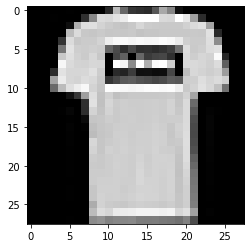

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1], cmap="gray")

In [ ]:
import copy

covered_x_train = copy.deepcopy(x_train)

for i in range(len(x_train)):
  for x in range(10, 16):
    for y in range(10, 16):
      covered_x_train[i][x,y] = 0


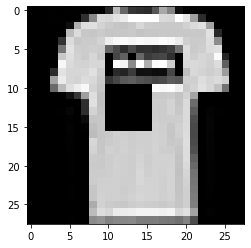

In [ ]:
plt.imshow(covered_x_train[1], cmap="gray")

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x1 = keras.layers.Flatten()(encoder_input)
x2 = keras.layers.Dense(128, activation="relu")(x1)
encoder_output = keras.layers.Dense(64, activation="relu")(x2)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')


In [ ]:
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x2 = keras.layers.Dense(128, activation="relu")(decoder_input)
x1 = keras.layers.Dense(784, activation="relu")(x2)
decoder_output = keras.layers.Reshape((28, 28, 1))(x1)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')



In [ ]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_20 (Dense)             (None, 784)               

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
autoencoder.compile(opt, loss='mse')

In [ ]:
epochs = 50

history = autoencoder.fit(
      x_train,
      x_train,
      epochs=epochs, 
      batch_size=32, validation_split=0.10)   

Epoch 1/50
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0468 - val_loss: 0.0271
Epoch 2/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0256 - val_loss: 0.0239
Epoch 3/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0226 - val_loss: 0.0222
Epoch 4/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0215 - val_loss: 0.0212
Epoch 5/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0207 - val_loss: 0.0205
Epoch 6/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0198 - val_loss: 0.0204
Epoch 7/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0195 - val_loss: 0.0197
Epoch 8/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0193 - val_loss: 0.0197
Epoch 9/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0192 - val_loss: 0.0194
Epoch 10/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.019

In [ ]:
example = encoder.predict([ covered_x_train[0].reshape(-1, 28, 28, 1) ])


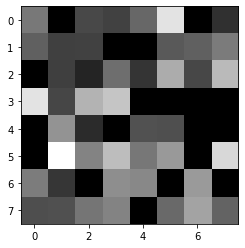

In [ ]:
plt.imshow(example[0].reshape((8,8)), cmap="gray")

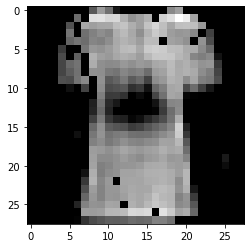

In [ ]:
ae_out = autoencoder.predict([ covered_x_train[10].reshape(-1, 28, 28, 1) ])

img = ae_out[0].reshape(28,28)

plt.imshow(img, cmap="gray")

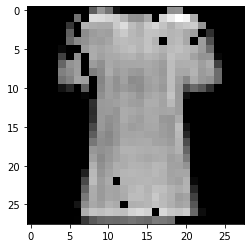

In [ ]:
ae_out = autoencoder.predict([x_train[10].reshape(-1, 28, 28, 1) ])

img = ae_out[0].reshape(28,28)

plt.imshow(img, cmap="gray")

Wnioski:


*   architektura zaimplementowanej sieci lub liczba epok uczenia nie jest wystarczająca, aby odtworzyć poprawny wygląd ubrań
*   większość autoenkoderów, których zadaniem jest odtworzenie zasłoniętego fragmentu obrazu to sieci konwolucyjne. Zatem przyczyną niezadowalających wyników może być zastosowanie sieci składającej się jedynie z warstw fully connected


